# Extraterrestrial Diplomatic Service Project: Presentation

#### The Problem Statement

It's 2733, and you are a data scientist for the Extraterrestrial Diplomatic Service. The Service is regularly tasked with providing guidance to the Galactic Council on potential trade and business relations with extraterrestrial civilizations. This analysis helps the Council in understanding the potential for fruitful collaborations.

At the annual meeting of the Extraterrestrial Diplomatic Service, presenters highlighted the success of several joint space missions conducted in collaboration with extraterrestrial civilizations. They suggested that these past achievements could indicate potential for expanding partnerships into areas such as trade and business. They wondered what other characteristics of extraterrestrial civilizations could serve as predictors of future successful partnerships.

**Your job** is to do EDA with the dataset to begin this analysis.
**The goal** is to create a report that:
1. Recommends variables that could serve as predictors of future successful partnerships to the council.
2. Backs up your suggestions with numerical data and graphs.

- Your dataset, `extraterrestrial_civilizations.csv` has a randomly selected set of 50 civilizations' information for the following variables:

`Name_of_civilzation`: The civilization's name

`Years_since_first_contact`: Number of years since humanity first made contact with this civilization. (0-300)

`Technological_progress`: A measure of the civilization's overall technological progress on a scale from 1 to 100.

`Diplomatic_relations_index`: A measure of diplomatic relations between Earth and the civilization on a scale from 1 to 10, with higher values indicating more positive relations.

`Cultural_exchange_index`: A measure of the degree of cultural exchange between Earth and the  civilization on a scale from 1 to 10, with higher values indicating more exchange.

`Joint_space_missions`: The number of joint space missions between Earth and the civilization.

`Hostility_to_Earth_Index`: A measure of the civilization's hostility to Earth on a scale from 1 to 10, with higher values indicating more hostility.

`Degree_of_positive_contact`: A continuous variable measuring the degree of positive  contact with Earth on a scale from 1 to 100, with higher values indicating more positive contact.



Michael - Research Question
Michael - Data Cleaning
Michael - Scatter technological progress vs. hostility to earth index
Praj - Non-target variable 
Praj - Conclusion

#### Question

- State the question you aimed to answer clearly

**Do civilizations with higher technological progress have a lower hostility-to-Earth index?**

#### Data Cleaning

- Describe the data cleaning & transformation that you did.
- Justify the decisions you made regarding outliers, missing values, and other transformations applied. 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read the CSV file into a pandas DataFrame 
et_data = pd.read_csv("Extraterrestrial_civilizations.csv")

# display the first five rows
et_data.head()

,Name_of_civilzation,Years_since_first_contact,Technological_progress,Diplomatic_relations_index,Cultural_exchange_index,Joint_space_missions,Hostility_to_Earth_Index,Degree_of_positive_contact,body_type,communication_type
0,Venusians,50.0,20.0,7.0,5.0,1.0,3.0,55.0,Animal-like,verbal
1,Gargeleblobs,120.0,85.0,8.0,NaN,12.0,2.0,88.0,Animal-like,pictorial
2,Vogons,75.0,50.0,6.0,NaN,4.0,4.0,60.0,Invertebrate-like,verbal
3,Betelgeusians,200.0,90.0,9.0,NaN,15.0,1.0,95.0,Invertebrate-like,telepathic
4,Pluvarians,150.0,70.0,7.0,NaN,10.0,3.0,75.0,Amorphous/Gel-like,pictorial


In [19]:
#2 Calculate the percentage of missing data for those variables
# Create a DataFrame of boolean values with True for missing values and False if there is not a missing value at that position:
missing_values = et_data.isnull()

#Calculate the percentage of missing data for each column
missing_percent = et_data.isnull().mean() * 100

#Display missing_percentages
print(missing_percent)

Name_of_civilzation            0.000000
Years_since_first_contact      0.000000
Technological_progress         0.000000
Diplomatic_relations_index     0.000000
Cultural_exchange_index       66.666667
Joint_space_missions           0.000000
Hostility_to_Earth_Index       0.000000
Degree_of_positive_contact     0.000000
body_type                      0.000000
communication_type             0.000000
dtype: float64


In [20]:
# Drop Cultural Exchange Index since mostly empty
et_data.drop('Cultural_exchange_index', axis=1, inplace=True)

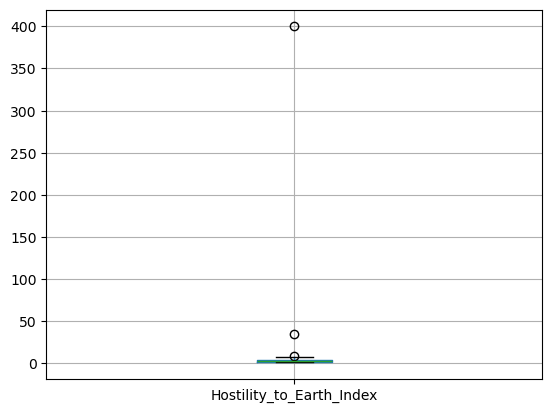

In [21]:
import matplotlib.pyplot as plt
et_data.boxplot('Hostility_to_Earth_Index')
plt.show()

In [22]:
# Replace Hostility to Earth Index outliers (value greater than 34) with median value
median_val = et_data['Hostility_to_Earth_Index'].median()

et_data.loc[et_data['Hostility_to_Earth_Index'] > 34, 'Hostility_to_Earth_Index'] = median_val

In [23]:
et_data.head(15)

,Name_of_civilzation,Years_since_first_contact,Technological_progress,Diplomatic_relations_index,Joint_space_missions,Hostility_to_Earth_Index,Degree_of_positive_contact,body_type,communication_type
0,Venusians,50.0,20.0,7.0,1.0,3.0,55.0,Animal-like,verbal
1,Gargeleblobs,120.0,85.0,8.0,12.0,2.0,88.0,Animal-like,pictorial
2,Vogons,75.0,50.0,6.0,4.0,4.0,60.0,Invertebrate-like,verbal
3,Betelgeusians,200.0,90.0,9.0,15.0,1.0,95.0,Invertebrate-like,telepathic
4,Pluvarians,150.0,70.0,7.0,10.0,3.0,75.0,Amorphous/Gel-like,pictorial
5,Xytrons,10.0,30.0,4.0,0.0,6.0,40.0,Amorphous/Gel-like,pictorial
6,Zarblatts,80.0,60.0,14.0,8.0,2.0,70.0,Invertebrate-like,verbal
7,Kritons,175.0,95.0,9.0,20.0,1.0,98.0,Invertebrate-like,pictorial
8,Qooglians,20.0,25.0,3.0,1.0,5.0,30.0,Animal-like,telepathic
9,Thumbers,100.0,80.0,5.0,7.0,3.0,83.0,Humanoid,verbal


#### Results & Recommendations


We begin with a scatter plot of the hostility to earth index vs technological progress, including a correlation coefficient, to assess how linearly related these characteristics are.

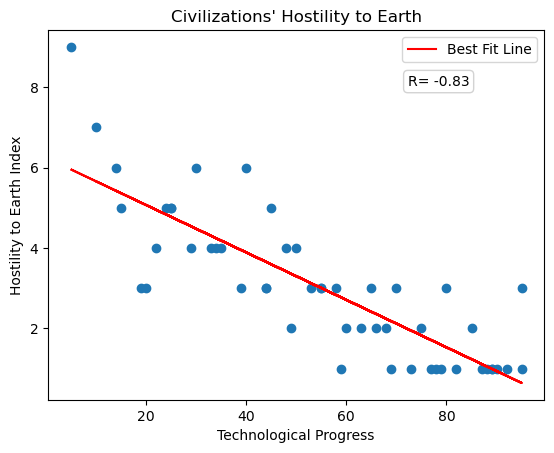

In [ ]:
# Scatter plot of Hostility to Earth Index vs Technological progress
x = et_data['Technological_progress']
y = et_data['Hostility_to_Earth_Index']
# Add best fit line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
y_hat = p(x)
corr = x.corr(y)
plt.scatter(x, y)
plt.plot(x, y_hat, color='red', label = "Best Fit Line")
plt.title("Civilizations' Hostility to Earth")
plt.xlabel('Technological Progress')
plt.ylabel('Hostility to Earth Index')
plt.legend()
plt.annotate(f'R= {corr:.2f}', xy=(0.725, 0.85), xycoords='axes fraction', fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='lightgray', facecolor='white'))
plt.show()


This shows pretty strong correlation, but is there a more highly correlated variable? Turns out there is:

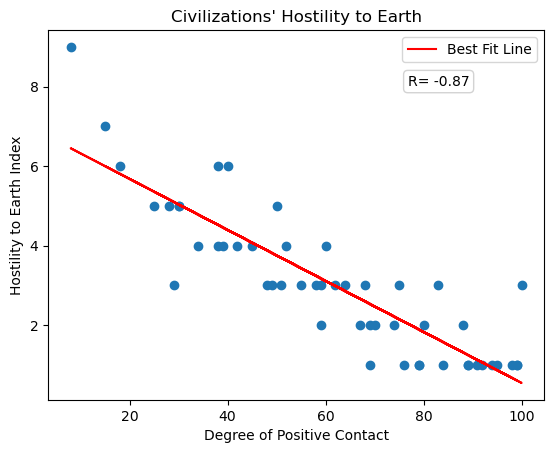

In [ ]:
# Scatter plot of Hostility to Earth Index vs Positive contact 
x = et_data['Degree_of_positive_contact']
y = et_data['Hostility_to_Earth_Index']
# Add best fit line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
y_hat = p(x)
corr = x.corr(y)
plt.scatter(x, y)
plt.plot(x, y_hat, color='red', label = "Best Fit Line")
plt.title("Civilizations' Hostility to Earth")
plt.xlabel('Degree of Positive Contact')
plt.ylabel('Hostility to Earth Index')
plt.legend()
plt.annotate(f'R= {corr:.2f}', xy=(0.725, 0.85), xycoords='axes fraction', fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='lightgray', facecolor='white'))
plt.show()

Comparing the correlation coefficient for hostility to earth vs degree of positive contact, we find that it is stonger than for technological progress.

Interestingly, the diplomatic relations index is less strongly correlated with hostility.

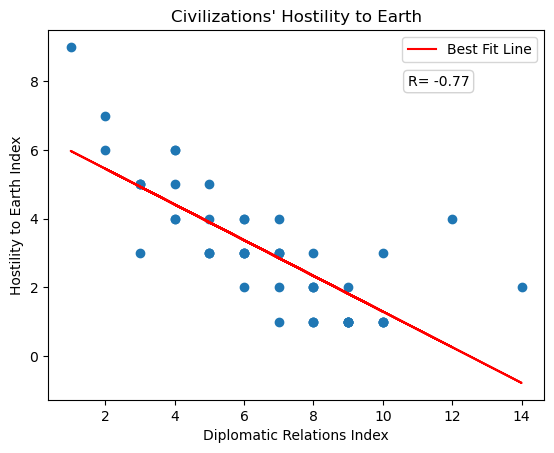

In [ ]:
# Scatter plot of Hostility to Earth Index vs Diplomatic_relations_index 
x = et_data['Diplomatic_relations_index']
y = et_data['Hostility_to_Earth_Index']
# Add best fit line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
y_hat = p(x)
corr = x.corr(y)
plt.scatter(x, y)
plt.plot(x, y_hat, color='red', label = "Best Fit Line")
plt.title("Civilizations' Hostility to Earth")
plt.xlabel('Diplomatic Relations Index')
plt.ylabel('Hostility to Earth Index')
plt.legend()
plt.annotate(f'R= {corr:.2f}', xy=(0.725, 0.85), xycoords='axes fraction', fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='lightgray', facecolor='white'))
plt.show()

#### Conclusions and Recommendations

While our initial variable (technological progress) did indeed reveal a strong correlation with hostility to Earth and may could be a good choice for assessing the viability of future collaboration with extraterrestrial civilizations. 

Degree of positive contact does have higher correlation and could be a better predictor of amount of hostility. However, we would point out that it is likely more expeditious to scertain a newly contacted civilization's technological prowess than to wait until there is enough data on the new civilization to establish a 'degree of positive contact' score.